In [130]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [131]:
%run ./common_init.ipynb

In [132]:
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Load custom code
import kdd98.data_handler as dh
from kdd98.config import Config
import pickle

In [133]:
# Where to save the figures
PROJECT_ROOT_DIR = "../../"
CHAPTER_ID = "random_forest"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "figures", CHAPTER_ID)

if not os.path.exists(IMAGES_PATH):
    os.makedirs(IMAGES_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Finding relevant features

In [134]:
with open(pathlib.Path(Config.get("df_store"), "learn_features.pkl"), "rb") as f:
    kdd98_learn_feat = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "learn_targets.pkl"), "rb") as f:
    kdd98_learn_targets = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "test_features.pkl"), "rb") as f:
    kdd98_test_feat = pickle.load(f)
with open(pathlib.Path(Config.get("df_store"), "test_targets.pkl"), "rb") as f:
    kdd98_test_targets = pickle.load(f)
    
# Extracting the data and resetting target to [-1, 1]
train_features = kdd98_learn_feat.values
train_target = kdd98_learn_targets.loc[:,"TARGET_B"].astype("int64").values
test_features = kdd98_test_feat.values
test_target = kdd98_test_targets.loc[:,"TARGET_B"].astype("int64").values

In [11]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced_subsample', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf,
                         n_estimators='auto',
                         verbose=2,
                         random_state=Config.get("random_seed"))

In [12]:
# find all relevant features
feat_selector.fit(train_features, train_target)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	660
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	9 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	10 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	11 / 100
Confirmed: 	74
Tentative: 	70
Rejected: 	516


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	12 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	13 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	14 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	15 / 100
Confirmed: 	74
Tentative: 	54
Rejected: 	532


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	16 / 100
Confirmed: 	75
Tentative: 	44
Rejected: 	541


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	17 / 100
Confirmed: 	75
Tentative: 	44
Rejected: 	541


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	18 / 100
Confirmed: 	75
Tentative: 	44
Rejected: 	541


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	19 / 100
Confirmed: 	75
Tentative: 	35
Rejected: 	550


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	20 / 100
Confirmed: 	75
Tentative: 	35
Rejected: 	550


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	21 / 100
Confirmed: 	75
Tentative: 	35
Rejected: 	550


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	22 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	23 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	24 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	25 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	26 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	27 / 100
Confirmed: 	75
Tentative: 	27
Rejected: 	558


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	28 / 100
Confirmed: 	75
Tentative: 	26
Rejected: 	559


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	29 / 100
Confirmed: 	75
Tentative: 	23
Rejected: 	562


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	30 / 100
Confirmed: 	75
Tentative: 	23
Rejected: 	562


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	31 / 100
Confirmed: 	75
Tentative: 	23
Rejected: 	562


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	32 / 100
Confirmed: 	75
Tentative: 	17
Rejected: 	568


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	33 / 100
Confirmed: 	75
Tentative: 	17
Rejected: 	568


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	34 / 100
Confirmed: 	75
Tentative: 	15
Rejected: 	570


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	35 / 100
Confirmed: 	75
Tentative: 	15
Rejected: 	570


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	36 / 100
Confirmed: 	75
Tentative: 	15
Rejected: 	570


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	37 / 100
Confirmed: 	75
Tentative: 	14
Rejected: 	571


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	38 / 100
Confirmed: 	75
Tentative: 	14
Rejected: 	571


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	39 / 100
Confirmed: 	75
Tentative: 	14
Rejected: 	571


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	40 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	41 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	42 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	43 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	44 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	45 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	46 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	47 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	48 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	49 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	50 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	51 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	52 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	53 / 100
Confirmed: 	75
Tentative: 	12
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	54 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	55 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	56 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	57 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	58 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	59 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	60 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	61 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	62 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	63 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	64 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	65 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	66 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	67 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	68 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	69 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	70 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	71 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	72 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	73 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	74 / 100
Confirmed: 	76
Tentative: 	11
Rejected: 	573


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	75 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	76 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	77 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	78 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	79 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	80 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	81 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	82 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	83 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	84 / 100
Confirmed: 	76
Tentative: 	10
Rejected: 	574


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	85 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	86 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	87 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	88 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	89 / 100
Confirmed: 	76
Tentative: 	9
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	90 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	91 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	92 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	93 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	94 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	95 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	96 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	97 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


Iteration: 	98 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575
Iteration: 	99 / 100
Confirmed: 	77
Tentative: 	8
Rejected: 	575


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	77
Tentative: 	1
Rejected: 	575


/data/anaconda/envs/py36/lib/python3.6/site-packages/boruta/boruta_py.py:418: RuntimeWarning: invalid value encountered in greater
  hits = np.where(cur_imp[0] > imp_sha_max)[0]


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=260, n_jobs=-1, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7f4ab1042750>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7f4ab1042750>,
     two_step=True, verbose=2)

In [135]:
# call transform() on X to filter it down to selected features
X_train = feat_selector.transform(train_features)
X_test = feat_selector.transform(test_features)

In [70]:
from imblearn.over_sampling import RandomOverSampler

ovs = RandomOverSampler(sampling_strategy="minority", random_state=Config.get("random_seed"), )
X_resampled, y_resampled = ovs.fit_resample(X_train, train_target)

## Setting up classifier

In [157]:
# Setting up the classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, roc_auc_score, balanced_accuracy_score
from sklearn.pipeline import Pipeline

In [208]:
param_grid = {
    "class_weight": ["balanced"],
    "n_estimators": [100],
    'min_samples_split': [0.01,0.1],
    "max_depth": [None, 5, 10]
}

# We use the same strategy as for splitting into train / test set to provide cv splits:
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2,random_state=Config.get("random_seed"))

scoring = {"AUC": make_scorer(roc_auc_score, average="weighted"), "bal_acc": make_scorer(balanced_accuracy_score)}

In [209]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=Config.get("random_seed")),
    param_grid,
    scoring=scoring,
    pre_dispatch=4,
    n_jobs=-1,
    cv=cv,
    refit="AUC",
    return_train_score=True,
    verbose=3)

# Fitting

In [210]:
grid_search.fit(X_train, train_target)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.7min finished


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'class_weight': ['balanced'], 'n_estimators': [100], 'min_samples_split': [0.01, 0.1], 'max_depth': [None, 5, 10]},
       pre_dispatch=4, refit='AUC', return_train_score=True,
       scoring={'AUC': make_scorer(roc_auc_score, average=weighted), 'bal_acc': make_scorer(balanced_accuracy_score)},
       verbose=3)

In [211]:
results = grid_search.cv_results_

In [212]:
results

{'mean_fit_time': array([39.75962572, 18.96096702, 21.31903591, 21.42065187, 33.43676538,
        18.6203969 ]),
 'std_fit_time': array([5.1489124 , 3.69511818, 1.77165009, 2.72815311, 4.7220707 ,
        3.92561191]),
 'mean_score_time': array([1.09472647, 0.56701984, 0.57969117, 0.67539449, 0.65232263,
        0.51243834]),
 'std_score_time': array([0.09450174, 0.16098044, 0.1519766 , 0.08974661, 0.18795602,
        0.13919656]),
 'param_class_weight': masked_array(data=['balanced', 'balanced', 'balanced', 'balanced',
                    'balanced', 'balanced'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[0.01, 0.1, 0.01, 0.1, 0.01, 0.1],
              mask=[False, False, False, False, Fals

/data/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


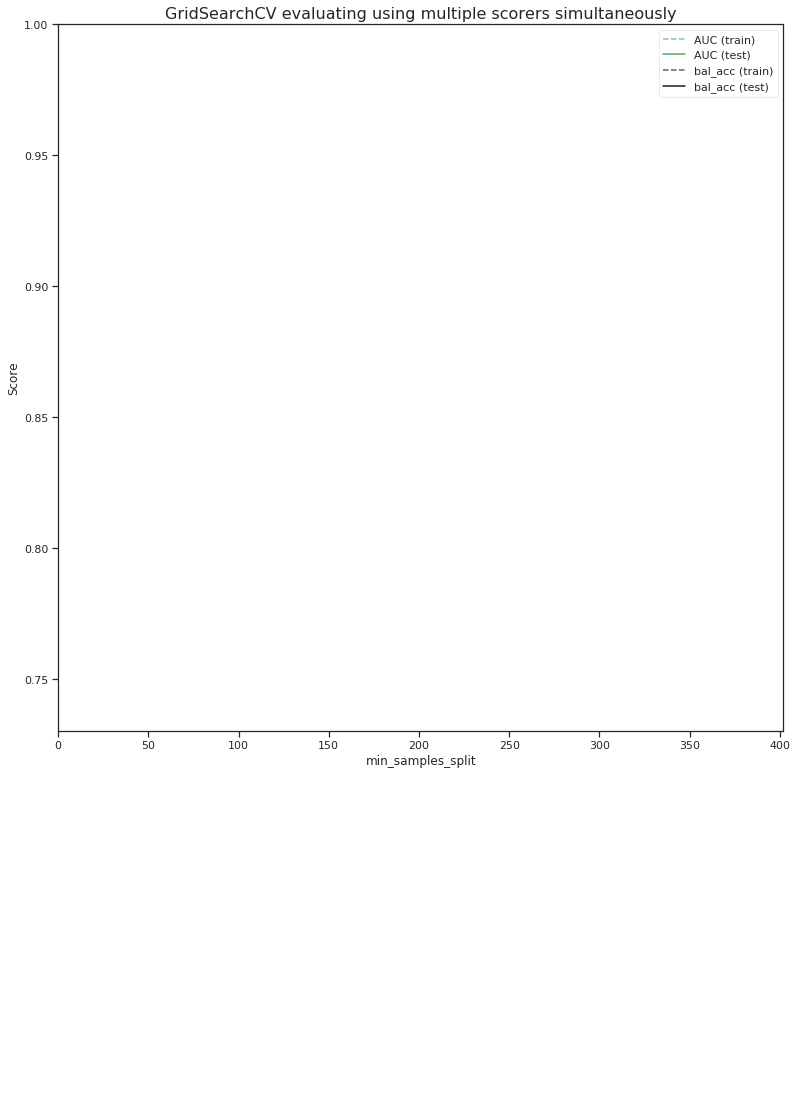

In [213]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [214]:
best_estimator = grid_search.best_estimator_

In [215]:
best_estimator.get_params()

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 0.01,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [216]:
boruta_features = kdd98_learn_feat.columns.values[feat_selector.support_]

In [217]:
boruta_features

array(['AGE', 'NUMCHLD', 'WEALTH2', 'PEPSTRFL', 'HV1', 'HV2', 'HVP1',
       'HVP2', 'HVP3', 'HVP4', 'DMA', 'IC4', 'IC5', 'HHAS3', 'POBC2',
       'CARDPROM', 'NUMPROM', 'CARDPM12', 'NUMPRM12', 'RAMNT_8',
       'RAMNT_9', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14',
       'RAMNT_16', 'RAMNT_22', 'RAMNT_24', 'RAMNTALL', 'NGIFTALL',
       'CARDGIFT', 'MINRAMNT', 'MAXRAMNT', 'LASTGIFT', 'AVGGIFT',
       'RFA_2F', 'RFA_2A', 'RFA_3F', 'RFA_3A', 'RFA_4F', 'RFA_4A',
       'RFA_5F', 'RFA_5A', 'RFA_6F', 'RFA_6A', 'RFA_7A', 'RFA_8F',
       'RFA_8A', 'RFA_9F', 'RFA_9A', 'RFA_10A', 'RFA_11F', 'RFA_11A',
       'RFA_12A', 'RFA_13A', 'RFA_14A', 'RFA_16A', 'RFA_23F',
       'ZIP_longitude', 'MONTHS_TO_DONATION_9', 'MONTHS_TO_DONATION_14',
       'MONTHS_TO_DONATION_15', 'MONTHS_TO_DONATION_19',
       'MONTHS_TO_DONATION_22', 'MONTHS_TO_DONATION_24',
       'LASTDATE_DELTA_MONTHS', 'MAXRDATE_DELTA_MONTHS',
       'ODATEDW_DELTA_YEARS', 'GEOCODE_02', 'RFA_3R_S', 'RFA_4R_S',
       'RFA_6R_S',

In [218]:
gs_features = best_estimator.feature_importances_
gs_important_features = pd.DataFrame(data=gs_features, index=boruta_features, columns=["feature_importance"])

In [219]:
gs_important_features = gs_important_features.sort_values(ascending=False, by="feature_importance")

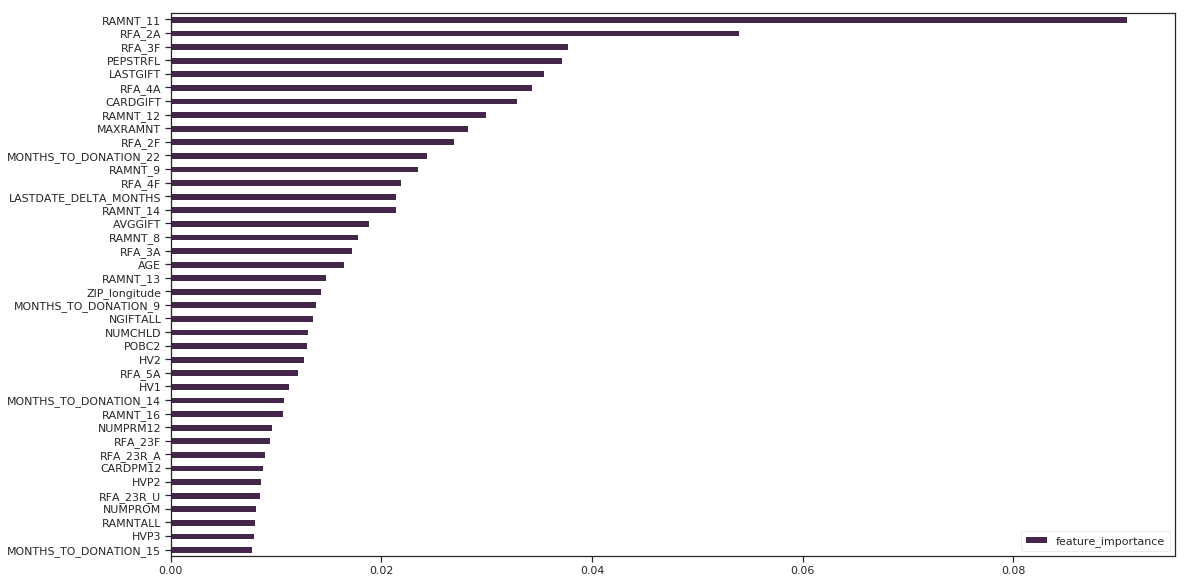

In [220]:
plt.rcParams['figure.figsize'] = (18, 10)
gs_important_features.head(n=40).sort_values(ascending=True, by="feature_importance").plot.barh()

# Predictions

In [221]:
y_predict = grid_search.predict(X_test)
y_true = test_target

In [222]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true,y_predict, labels=[1,0])

array([[  524,   445],
       [ 6256, 11858]])

In [223]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.54076367 0.45923633]
 [0.34536822 0.65463178]]


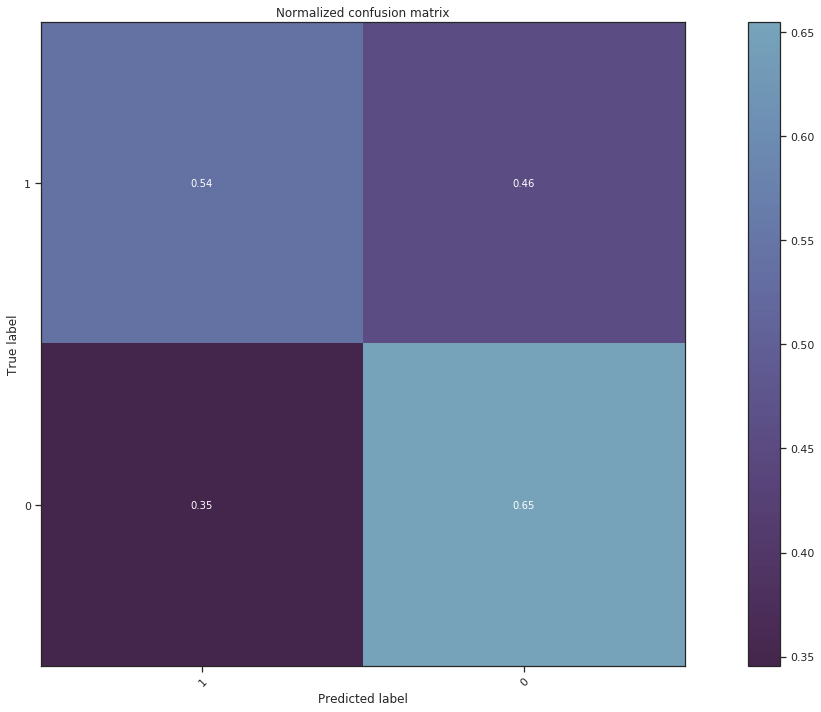

In [225]:
plot_confusion_matrix(y_true,y_predict, [1,0], normalize=True, cmap=Config.get("color_map"))